<a href="https://colab.research.google.com/github/Aditya-Kopulwar/Data-Science-Assignments/blob/main/Assignment_13_KNN/Code/Q1_glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare a model for glass classification using KNN

## Data Description:

- RI : refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- AI: Aluminum
- Si: Silicon
- K:Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

Type: Type of glass: (class attribute)
 * 1 : building_windows_float_processed
 * 2 : building_windows_non_float_processed
 * 3 : vehicle_windows_float_processed
 * 4 : vehicle_windows_non_float_processed (none in this database)
 * 5 : containers
 * 6 : tableware
 * 7 : headlamps

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
gs = pd.read_csv('https://raw.githubusercontent.com/Aditya-Kopulwar/Data-Science-Assignments/main/Assignment_13_KNN/Dataset/glass.csv')

gs

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [3]:
gs_nrow = gs.shape[0]

In [ ]:
def lost_record():

    gs_nrow_now = gs.shape[0]
    lost = gs_nrow - gs_nrow_now
    lost = (lost/gs_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [ ]:
gs.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [ ]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
gs.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [ ]:
uni(gs)


 All Unique Value in RI
[1.51115 1.51131 1.51215 1.51299 1.51316 1.51321 1.51409 1.51508 1.51514
 1.51531 1.51545 1.51556 1.51567 1.51569 1.51571 1.51574 1.51588 1.51589
 1.5159  1.51592 1.51593 1.51594 1.51596 1.51602 1.51605 1.51609 1.5161
 1.51613 1.51617 1.51618 1.51623 1.51625 1.51627 1.51629 1.51631 1.5164
 1.51643 1.51645 1.51646 1.51651 1.51652 1.51653 1.51655 1.51658 1.5166
 1.51662 1.51663 1.51665 1.51666 1.51667 1.5167  1.51673 1.51674 1.51683
 1.51685 1.51687 1.51689 1.5169  1.51694 1.51707 1.51708 1.51709 1.51711
 1.51719 1.5172  1.51721 1.51727 1.5173  1.51732 1.51735 1.51736 1.51742
 1.51743 1.51747 1.51748 1.5175  1.51751 1.51753 1.51754 1.51755 1.51756
 1.51761 1.51763 1.51764 1.51766 1.51768 1.51769 1.51775 1.51776 1.51778
 1.51779 1.51783 1.51784 1.51786 1.51789 1.51793 1.51796 1.51797 1.518
 1.51806 1.51808 1.51811 1.51813 1.51818 1.5182  1.51824 1.51829 1.51831
 1.51832 1.51837 1.51838 1.51839 1.51841 1.51844 1.51846 1.51847 1.51848
 1.51851 1.51852 1.5186  1.5186

### Checking for Duplicated Values

In [ ]:
gs[gs.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [ ]:
gs.drop_duplicates(inplace = True)

In [ ]:
gs[gs.duplicated()]

Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []

- There is no duplicate vale in are dataset

### Visualizing The Data

#### Ploting Boxplot

In [ ]:
def plot_box(df,r,c):
    r = int(r)
    c = int(c)
    fig,ax = plt.subplots(r,c)
    plt.tight_layout()

    for i in range(r):
        for j in range(c):
            sns.boxplot(df[df.columns[i+j]], ax = ax[i,j])

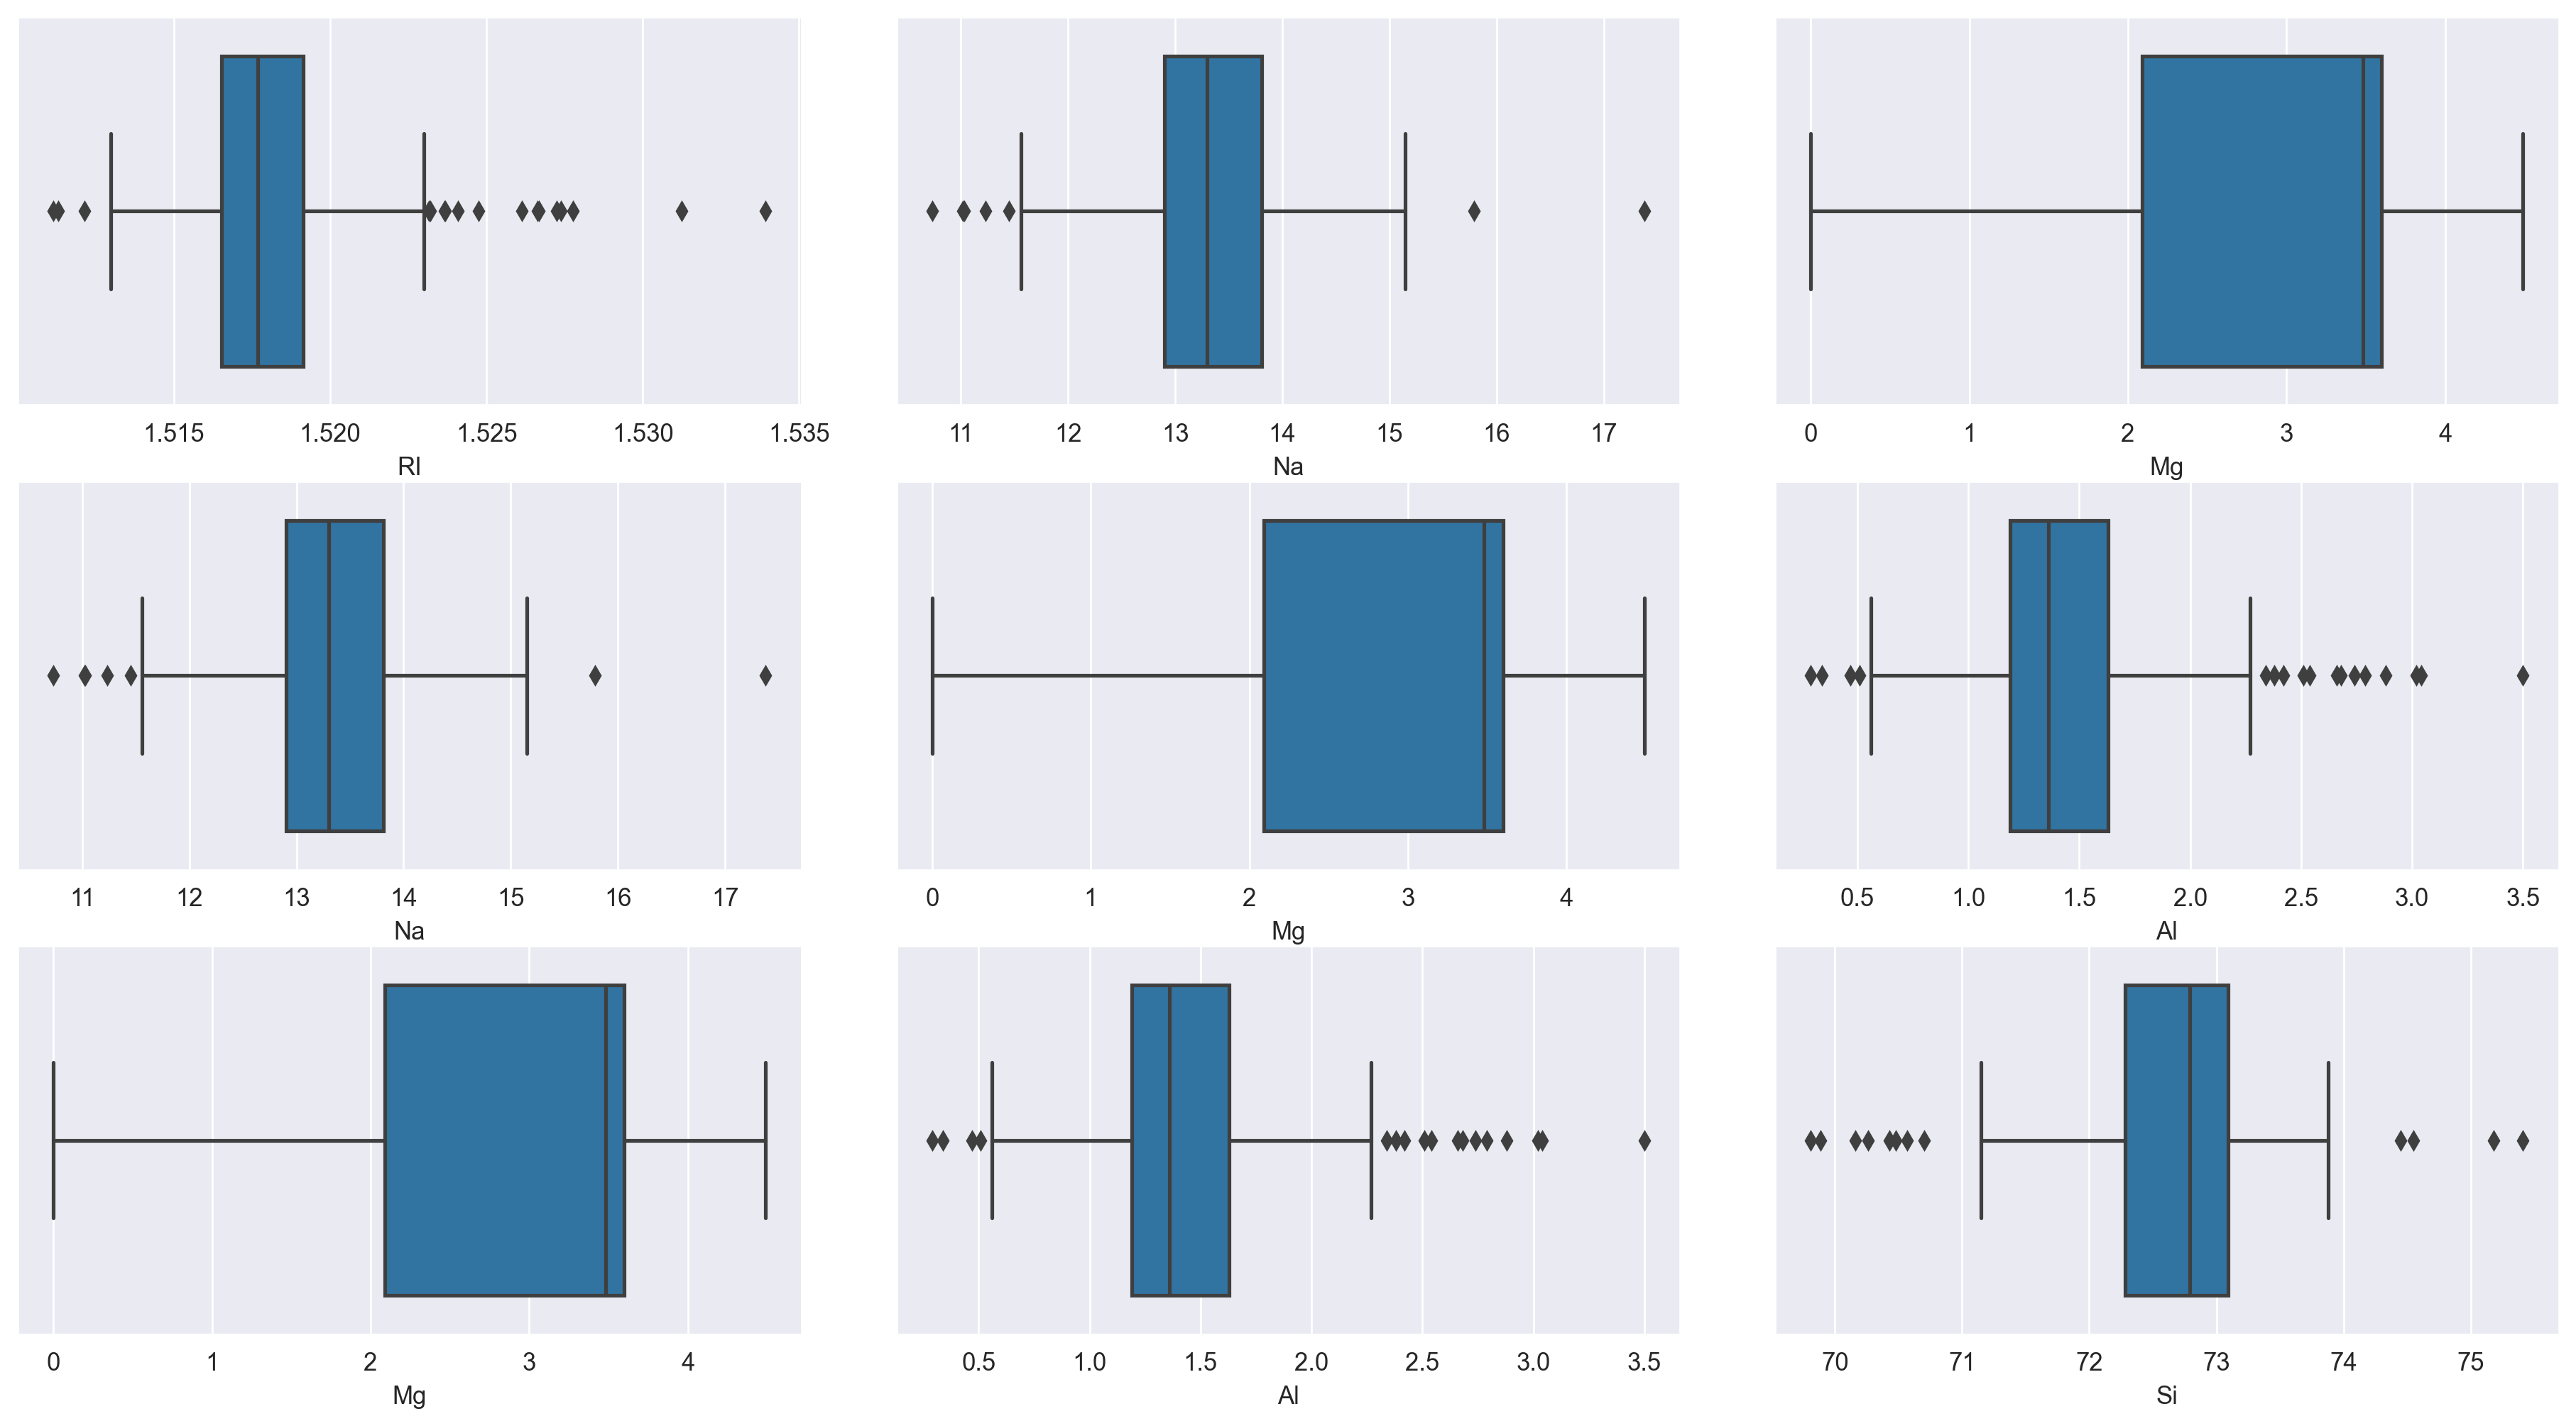

In [ ]:
plot_box(gs,3,3)

#### Ploting Histplot

In [ ]:
def plot_hist(df,r,c):
    r = int(r)
    c = int(c)
    fig,ax = plt.subplots(r,c)
    plt.tight_layout()

    for i in range(r):
        for j in range(c):
            sns.histplot(df[df.columns[i+j]], ax = ax[i,j])

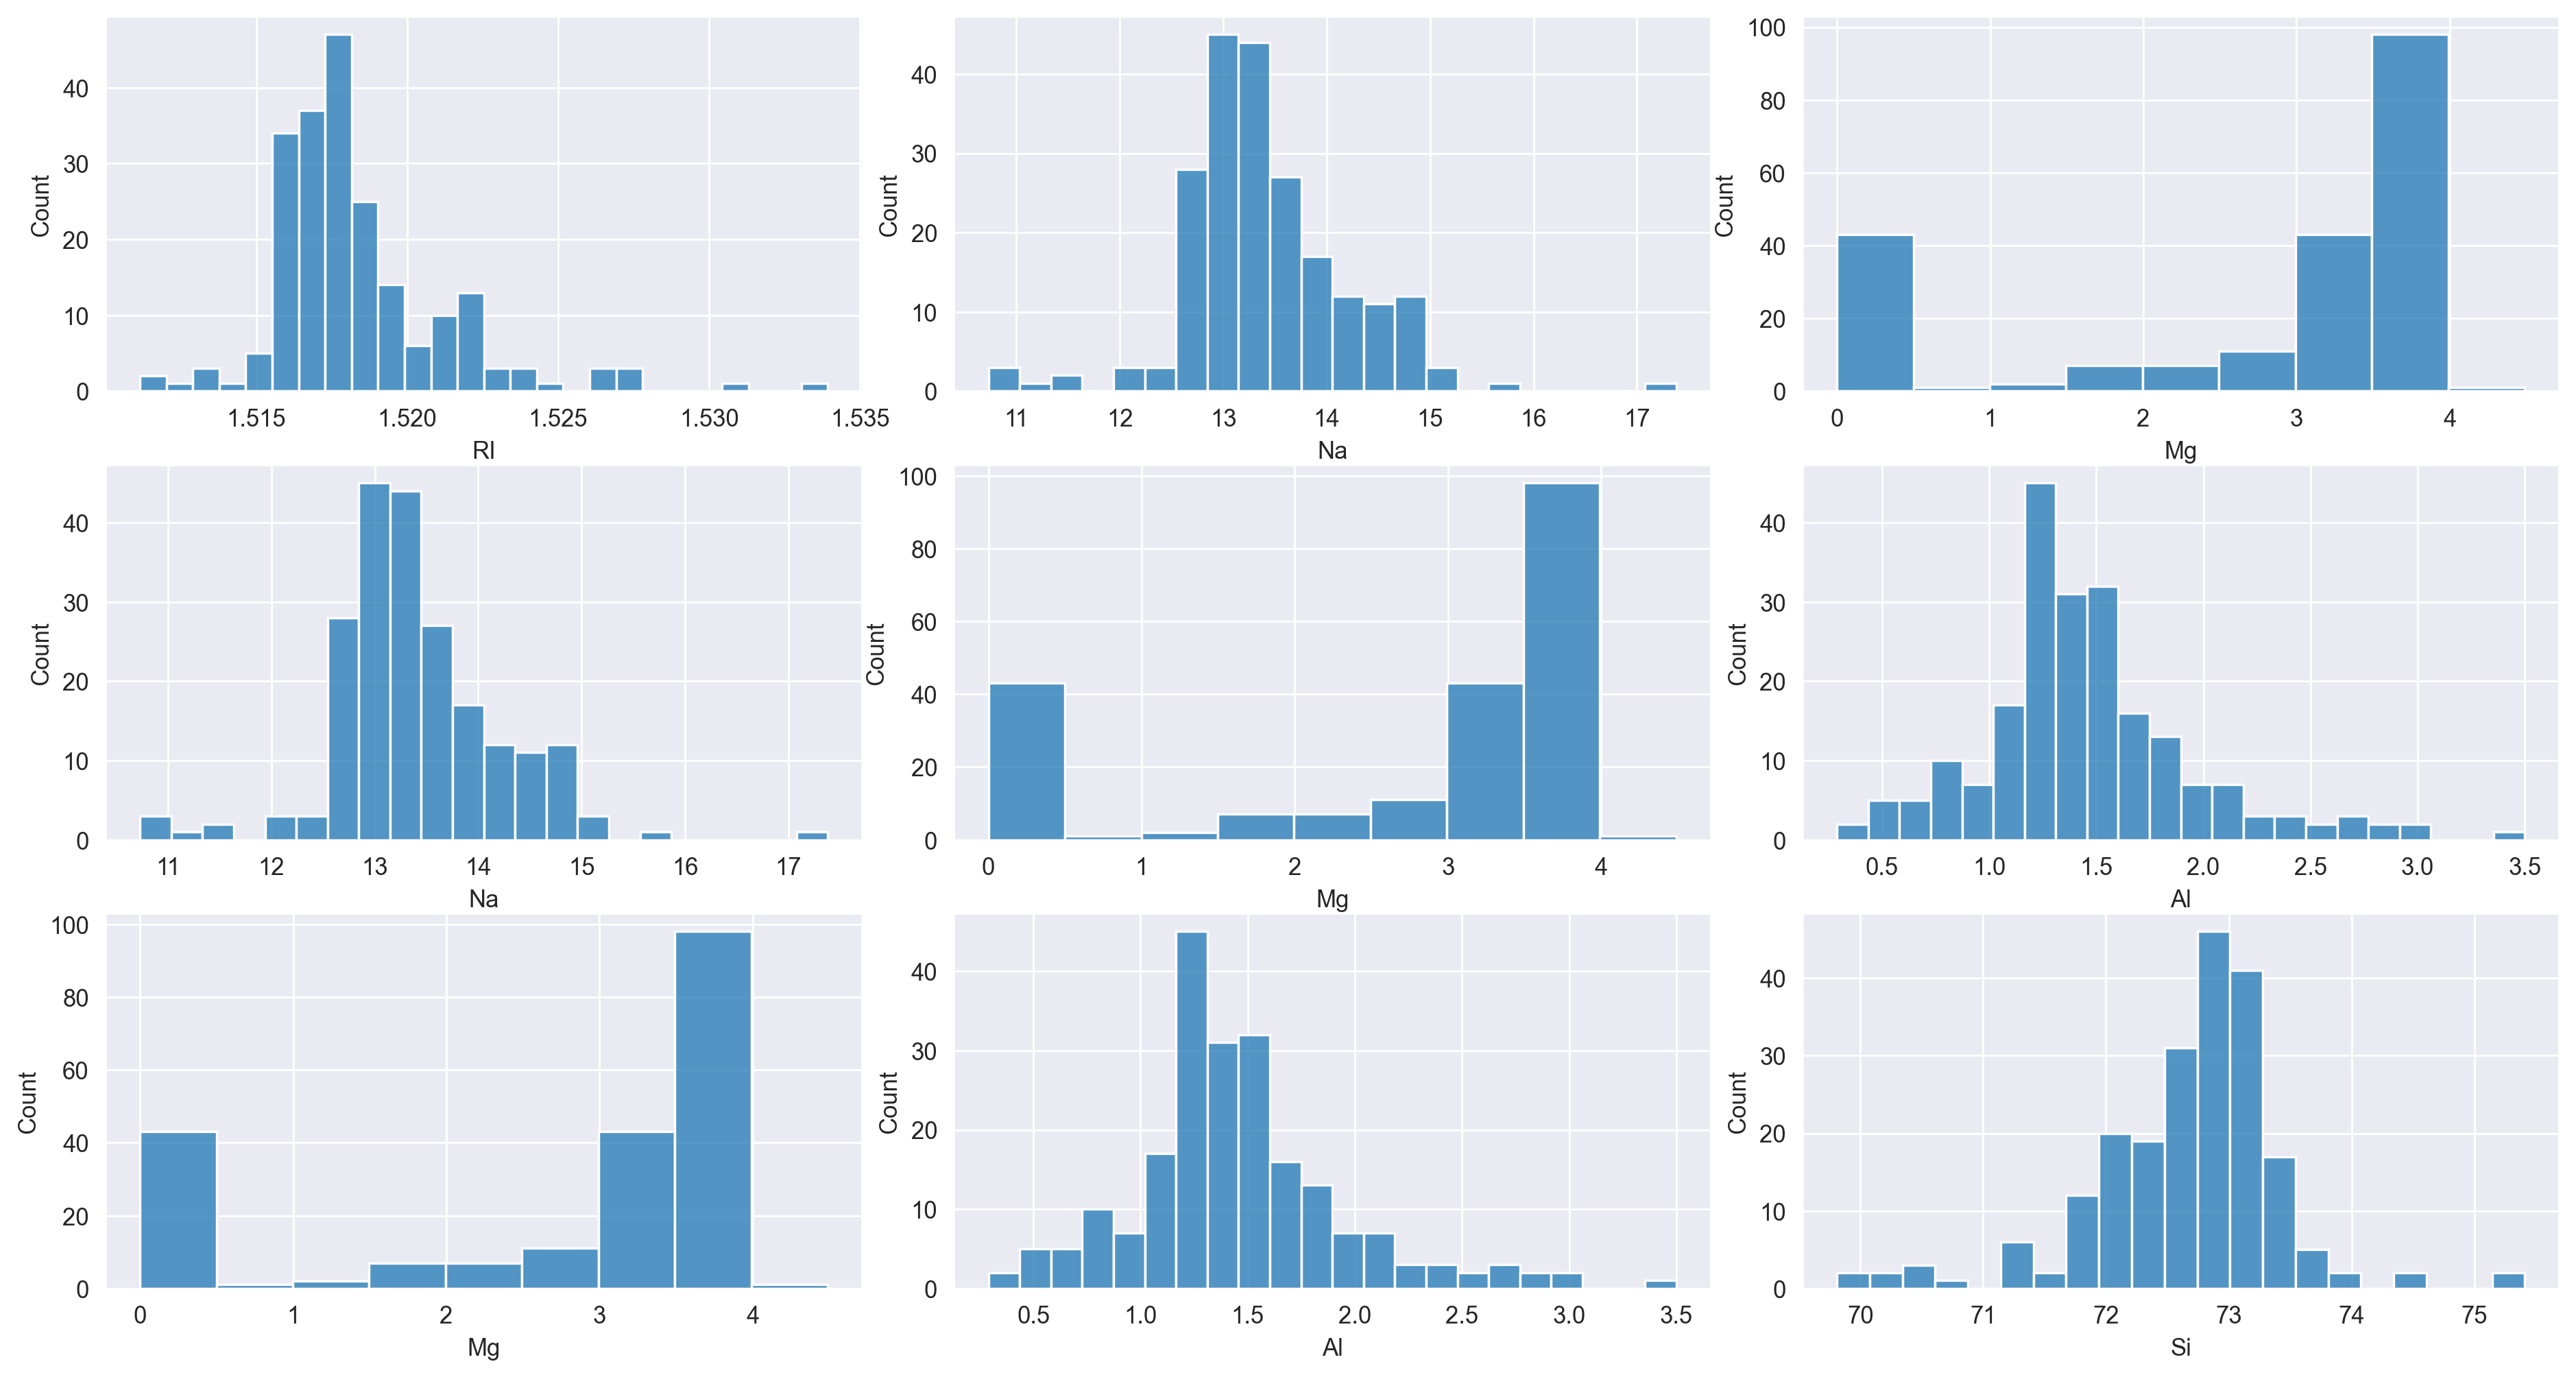

In [ ]:
plot_hist(gs,3,3)

#### Ploting QQ-Plot

In [ ]:
def plot_qq(df,r,c):
    r = int(r)
    c = int(c)
    fig,ax = plt.subplots(r,c)
    plt.tight_layout()

    for i in range(r):
        for j in range(c):
            sm.qqplot(df[df.columns[i+j]], ax = ax[i,j], line='q')

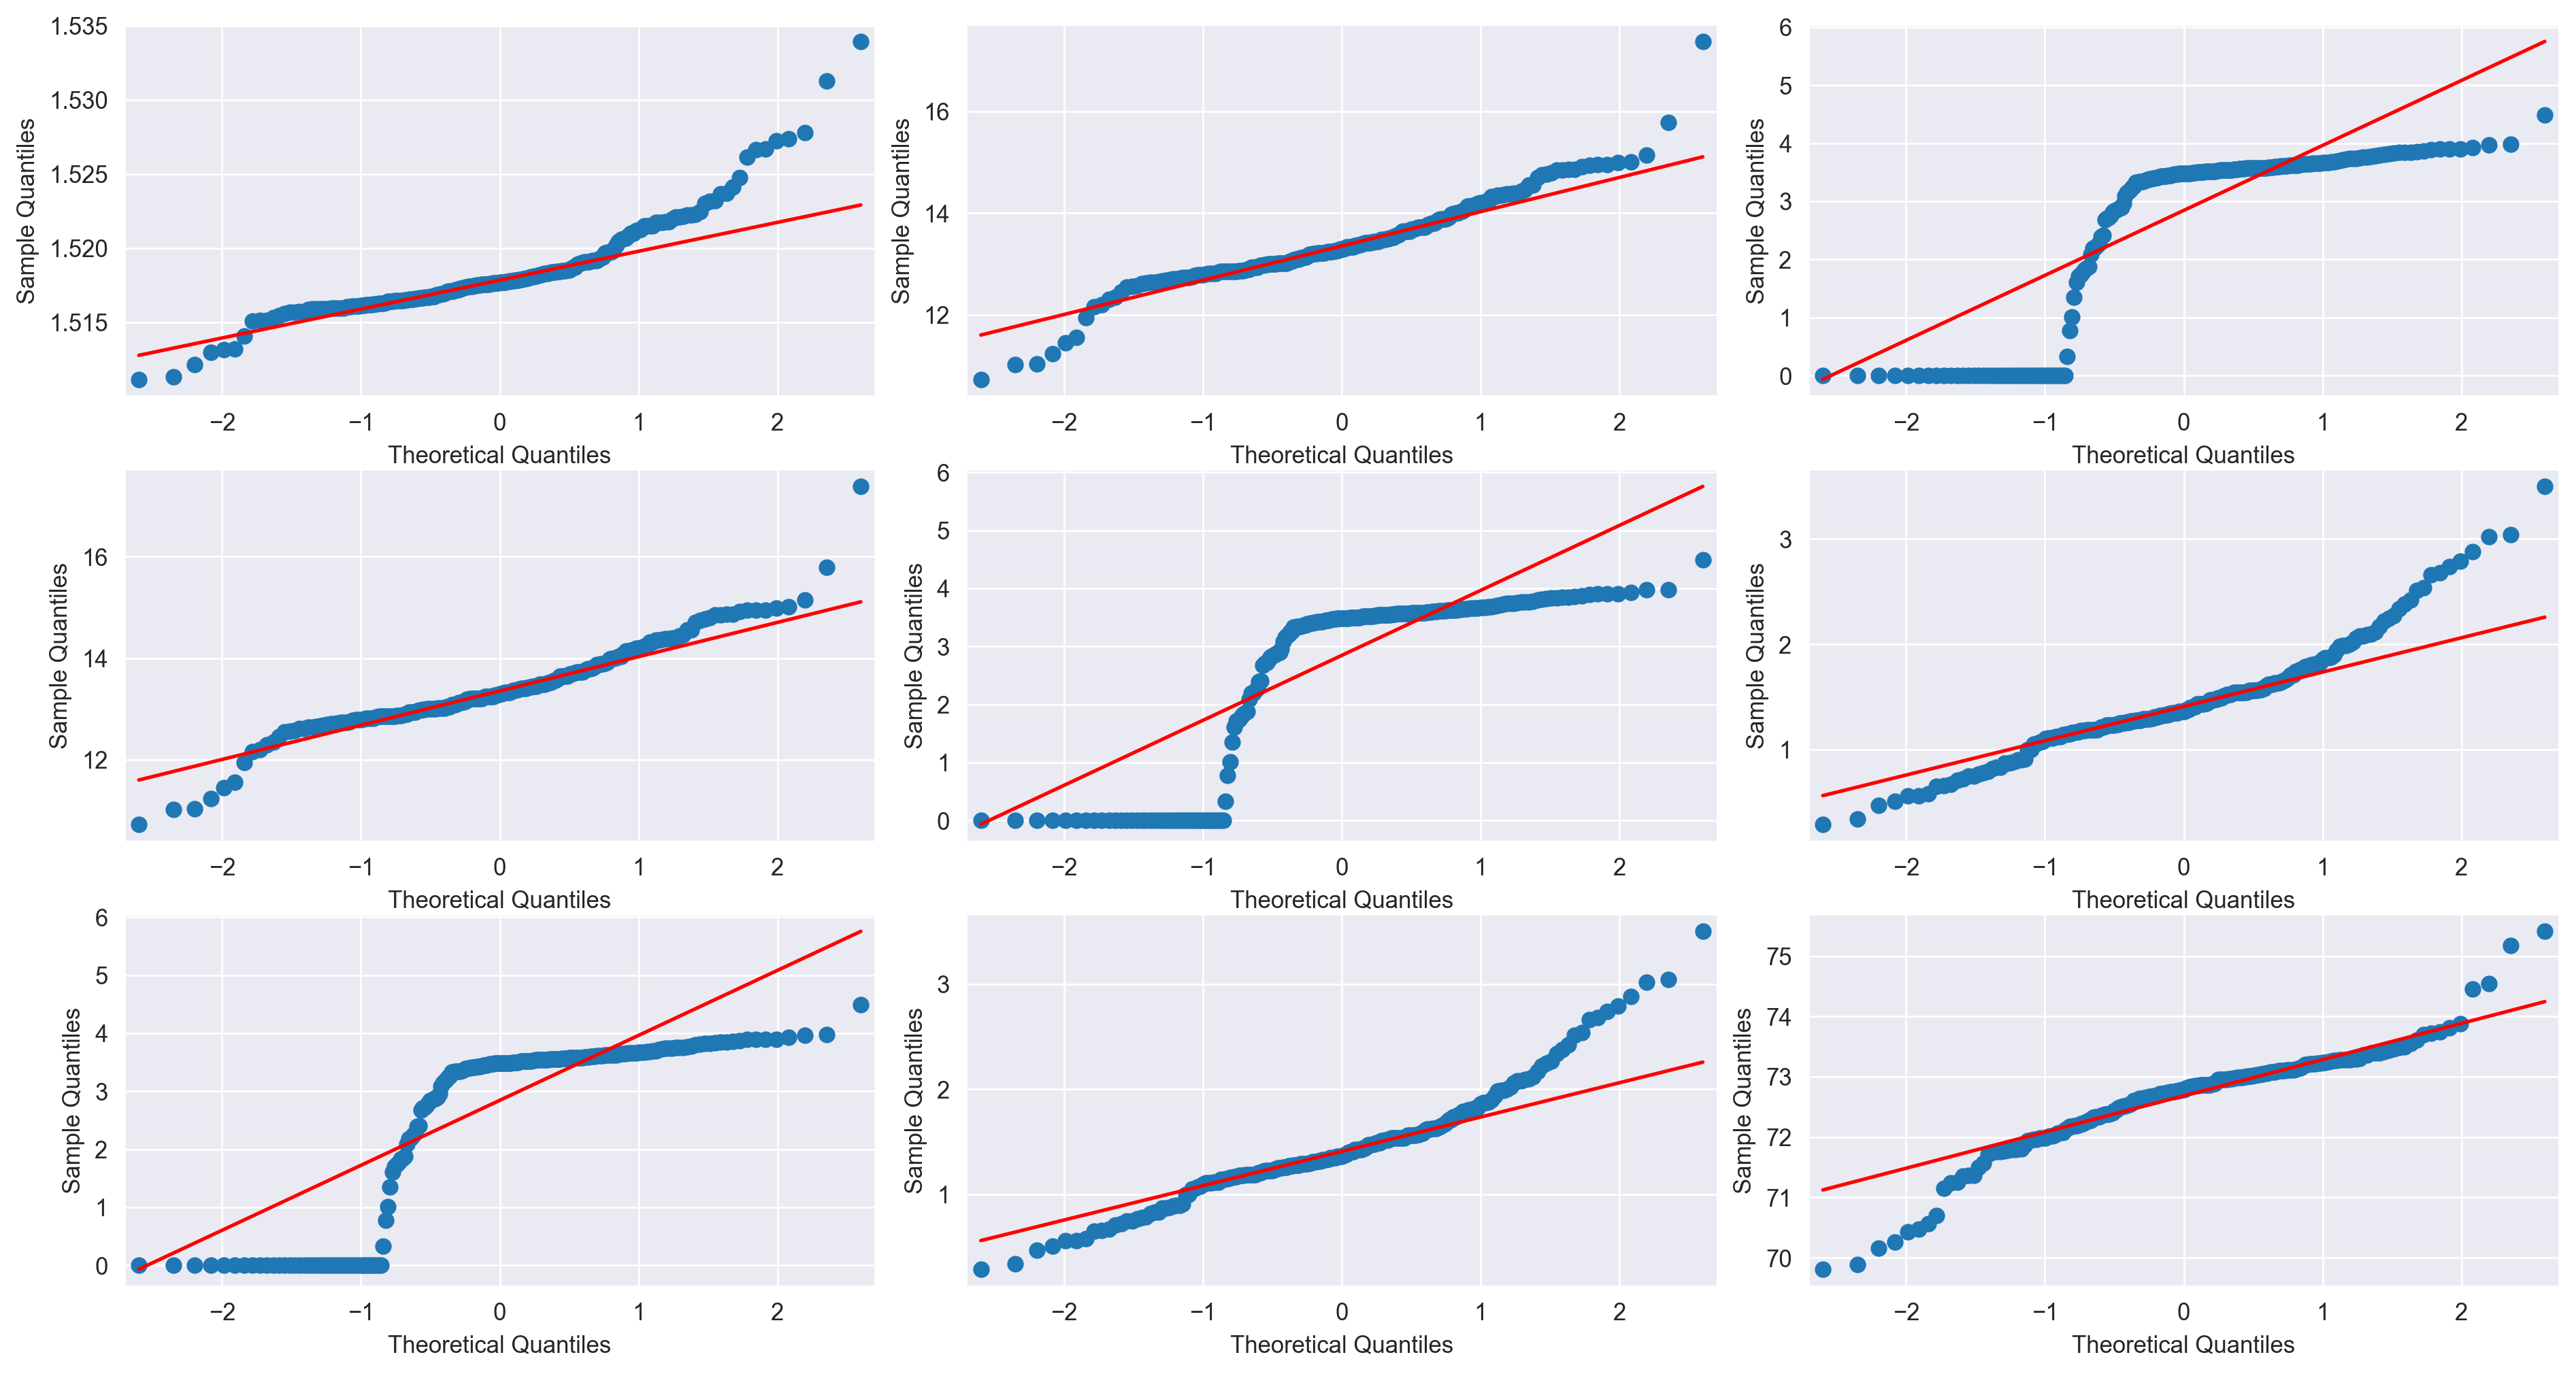

In [ ]:
plot_qq(gs,3,3)

### Correlation Analysis

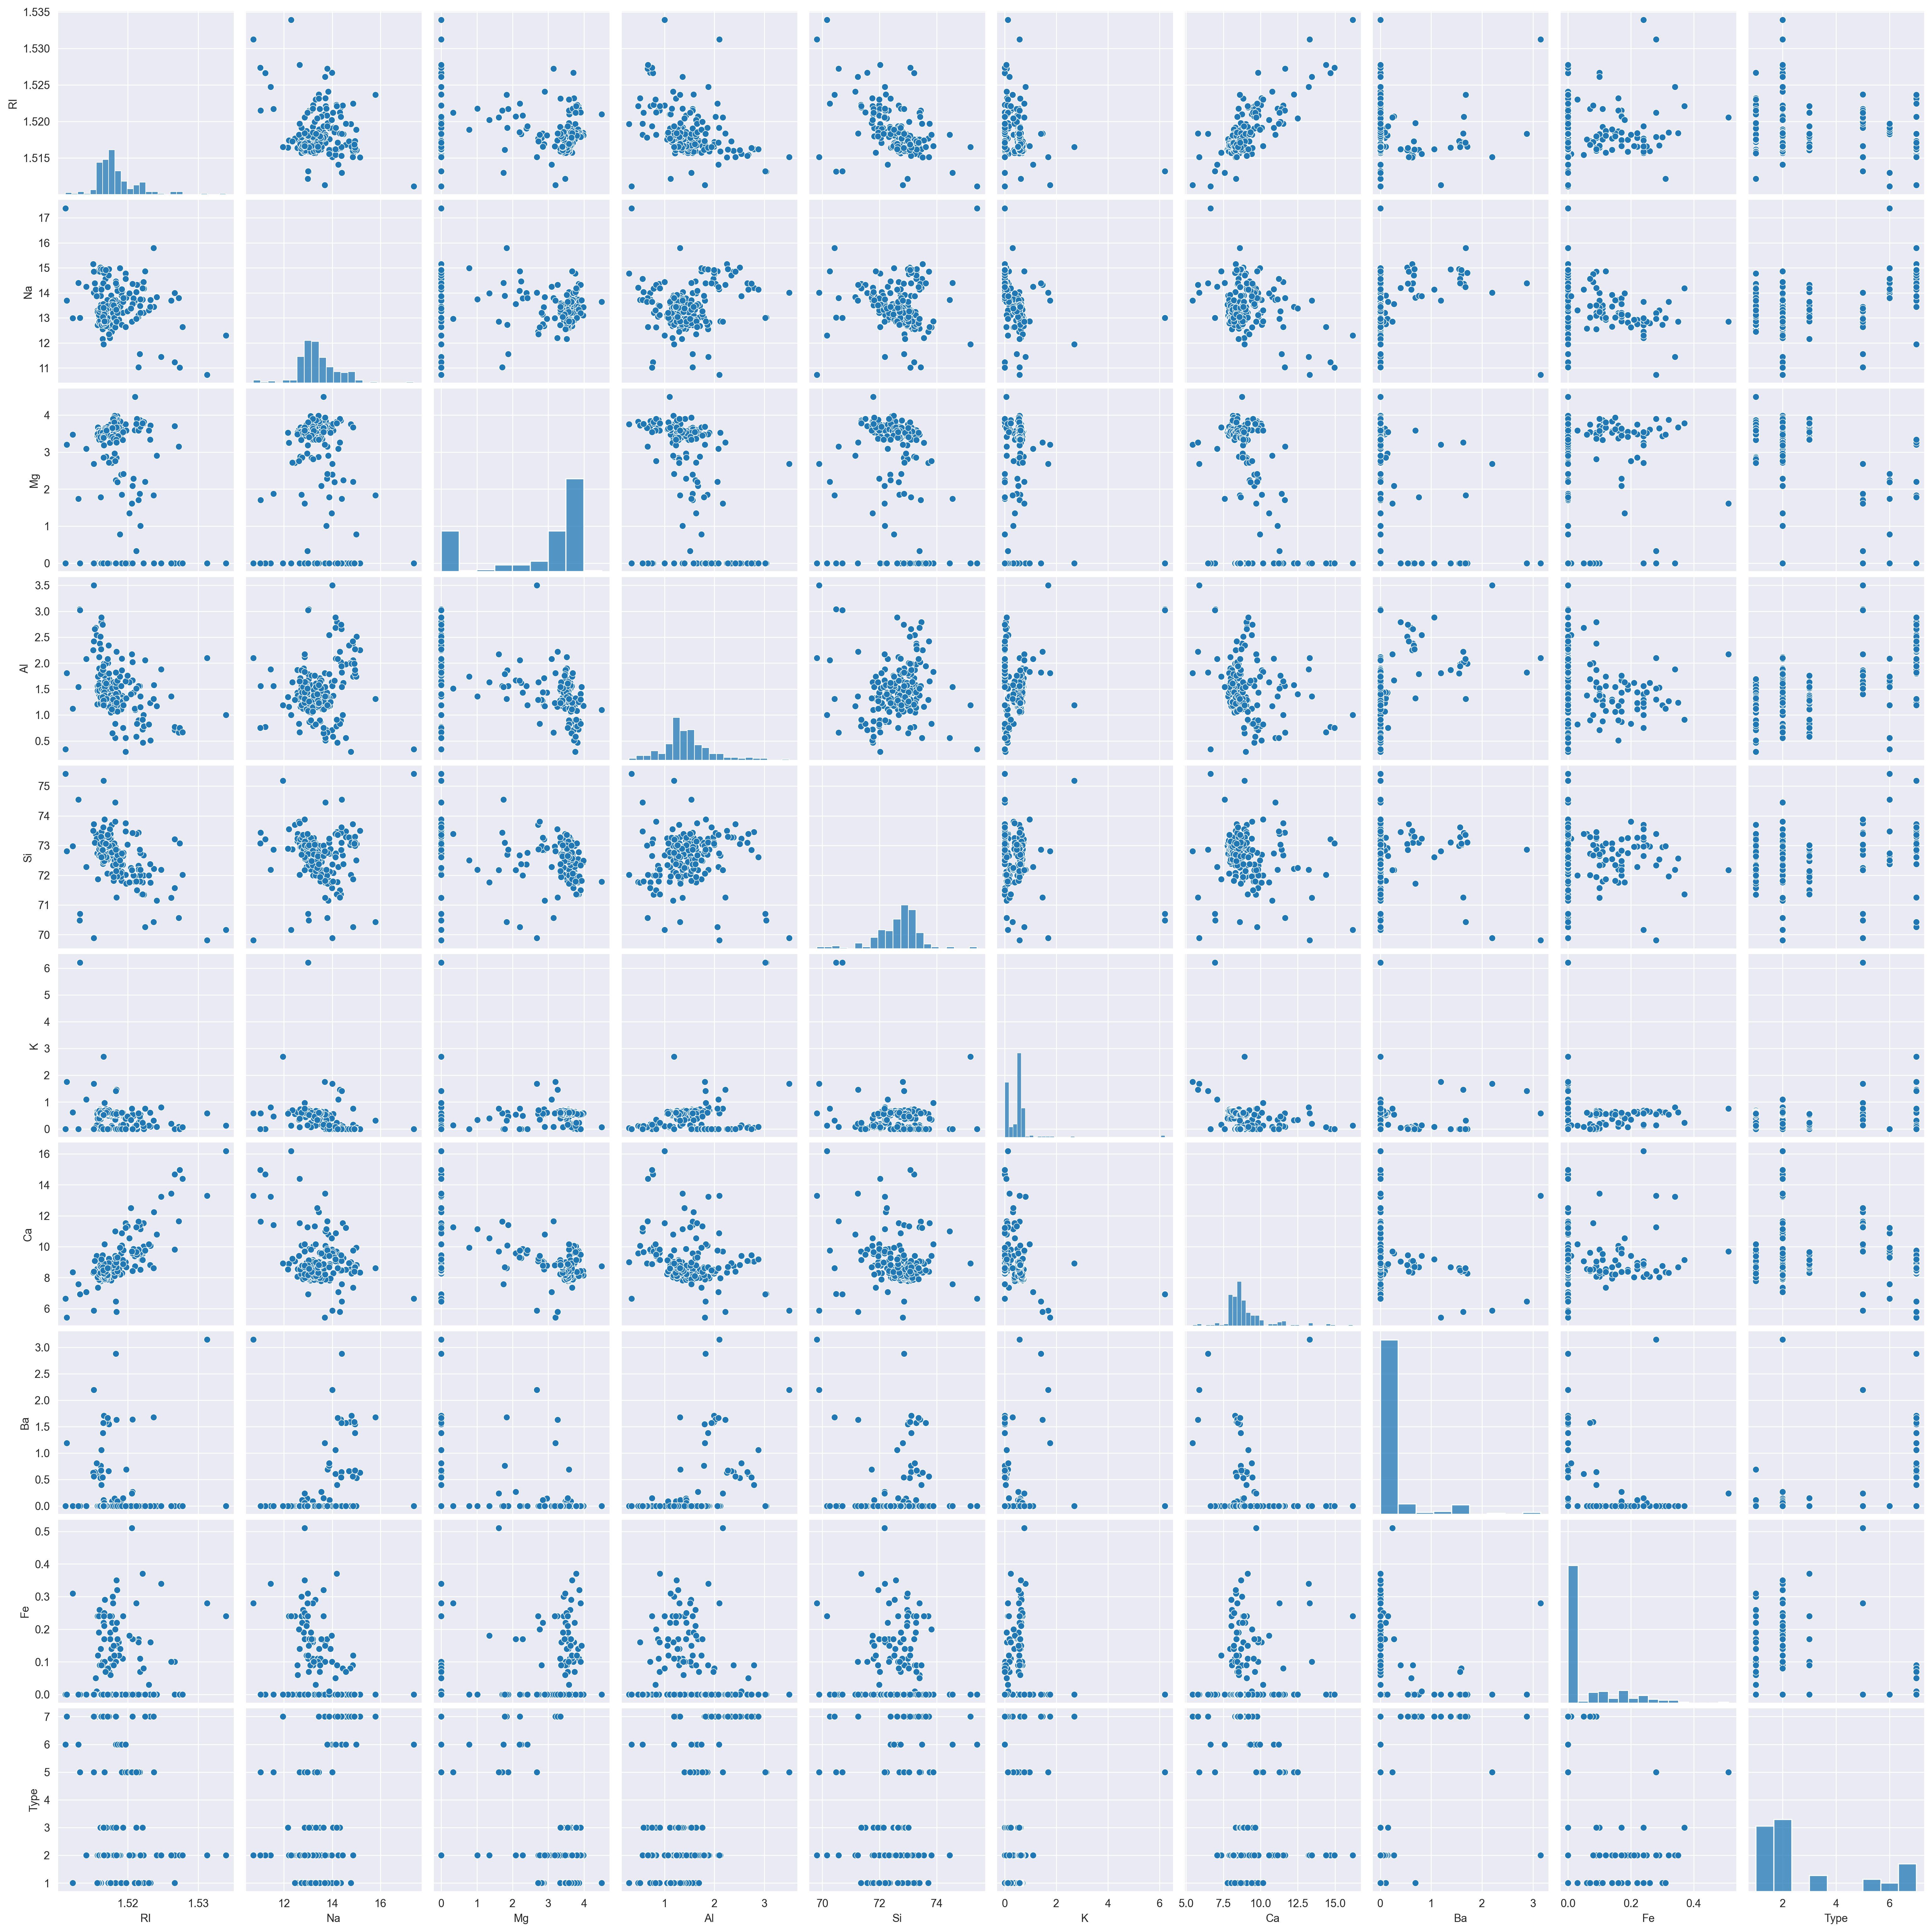

In [ ]:
sns.pairplot(data=gs)

<AxesSubplot:>

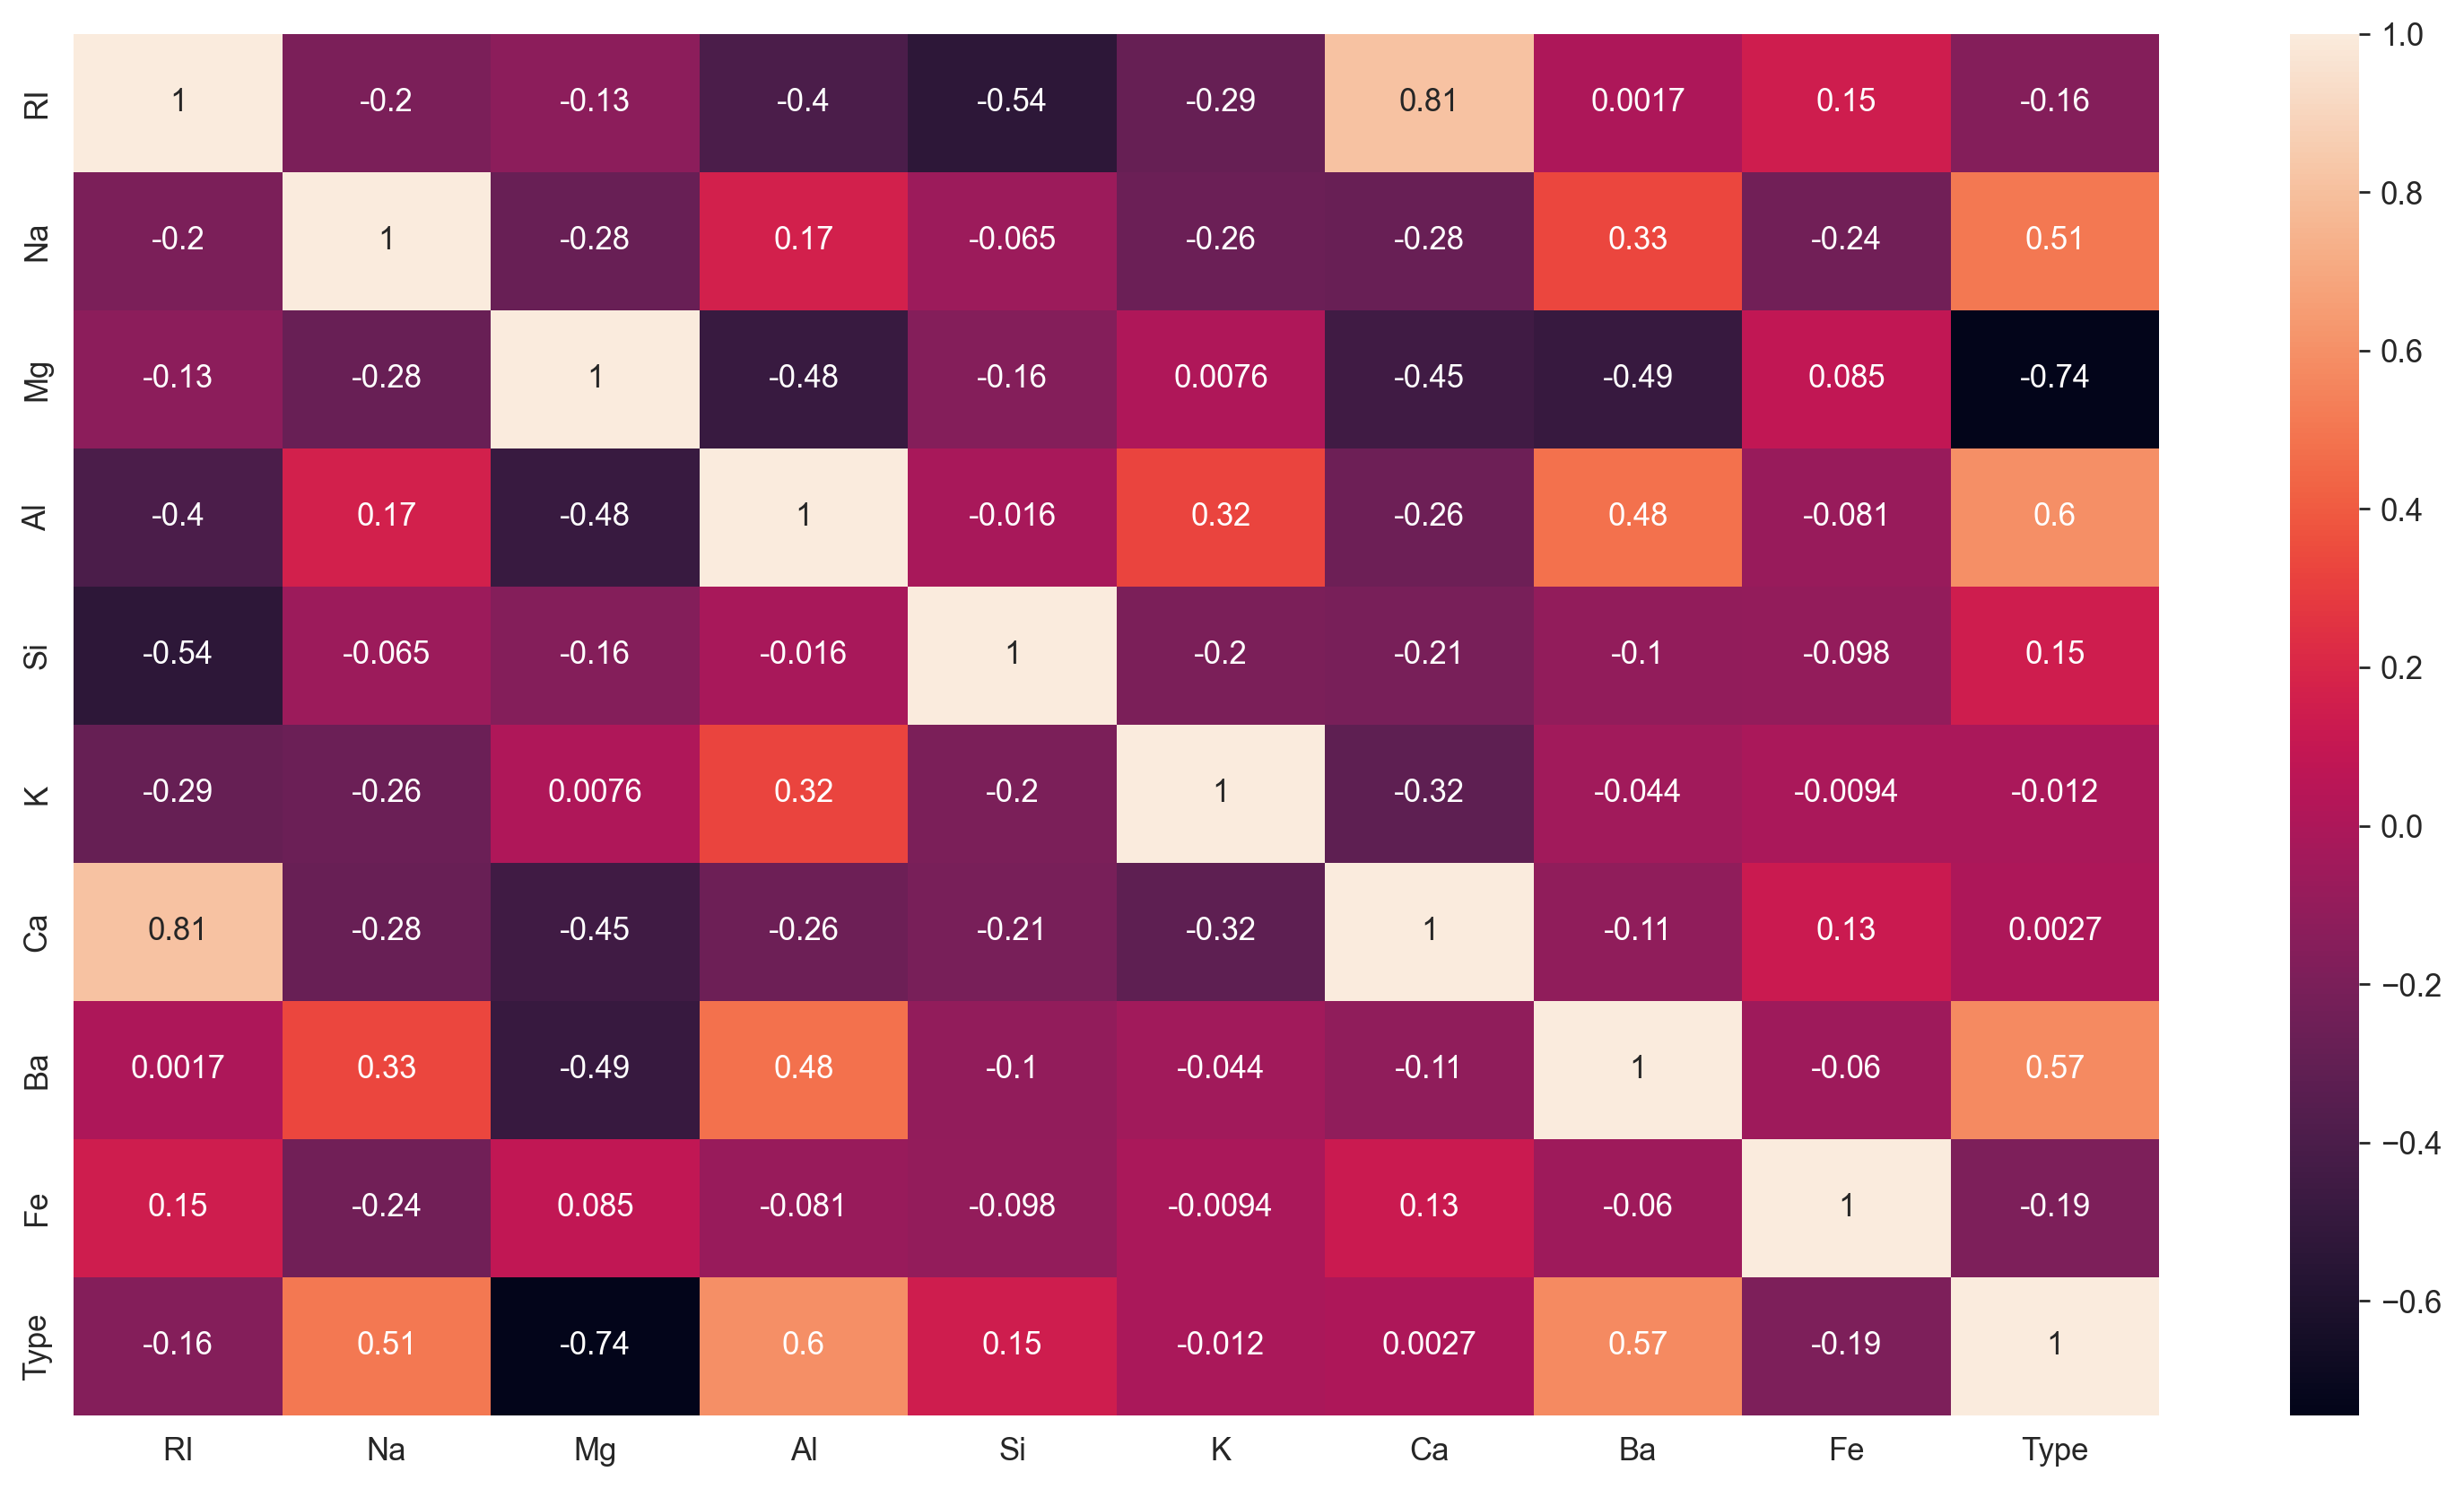

In [ ]:
sns.heatmap(gs.corr(), annot=True)

### Outlier Detection

In [ ]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [ ]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [ ]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage(Before)

In [ ]:
outlier_percentage(gs)

RI : 7.981220657276995 %
Na : 3.286384976525822 %
Mg : 0.0 %
Al : 7.981220657276995 %
Si : 5.633802816901409 %
K : 3.286384976525822 %
Ca : 12.676056338028168 %
Ba : 17.84037558685446 %
Fe : 5.633802816901409 %
Type : 13.615023474178404 %


#### Replacing Outlier In RI Column

In [ ]:
pe.box(gs['RI'], orientation='h')

In [ ]:
replace_outlier_extream(gs, 'RI')

In [ ]:
pe.box(gs['RI'], orientation='h')

#### Removing Outlier In Na Column

In [ ]:
pe.box(gs['Na'], orientation='h')

In [ ]:
gs = remove_outlier(gs, 'Na')

In [ ]:
pe.box(gs['Na'], orientation='h')

In [ ]:
lost_record()

We lost 3.74 % data


#### Replacing Outlier In Mg Column

In [ ]:
pe.box(gs['Mg'], orientation='h')

In [ ]:
replace_outlier_extream(gs, 'Mg')

In [ ]:
pe.box(gs['Mg'], orientation='h')

#### Replacing Outlier In Al Column

In [ ]:
pe.box(gs['Al'], orientation='h')

In [ ]:
replace_outlier_extream(gs, 'Al')

In [ ]:
pe.box(gs['Al'], orientation='h')

#### Removing Outlier In Si Column

In [ ]:
pe.box(gs['Si'], orientation='h')

In [ ]:
gs = remove_outlier(gs, 'Si')

In [ ]:
pe.box(gs['Si'], orientation='h')

In [ ]:
lost_record()

We lost 8.41 % data


#### Removing Outlier In K Column

In [ ]:
pe.box(gs['K'], orientation='h')

In [ ]:
gs = remove_outlier(gs, 'K')

In [ ]:
pe.box(gs['K'], orientation='h')

In [ ]:
lost_record()

We lost 9.81 % data


#### Replacing Outlier In Ca(Calcium) Column

In [ ]:
pe.box(gs['Ca'], orientation='h')

In [ ]:
replace_outlier_extream(gs, 'Ca')

In [ ]:
pe.box(gs['Ca'], orientation='h')

#### Outlier Percentage(After)

In [ ]:
outlier_percentage(gs)

RI : 4.145077720207254 %
Na : 2.072538860103627 %
Mg : 18.65284974093264 %
Al : 7.253886010362693 %
Si : 0.5181347150259068 %
K : 0.0 %
Ca : 0.0 %
Ba : 16.580310880829018 %
Fe : 5.181347150259067 %
Type : 11.917098445595855 %


- all value in are unique value, so well retain Outlier in Ba and Fe.
- we will retain outlier in Type becaue it is dependent column.

#### Reseting Index

In [ ]:
gs.reset_index(inplace=True)
gs.drop(columns='index', inplace=True)

gs

RI     Na       Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49000  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60000  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55000  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69000  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62000  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...      ...   ...    ...   ...   ...   ...  ...   ...
188  1.51623  14.14  0.57625  2.29  72.61  0.08  9.18  1.06  0.0     7
189  1.51685  14.92  0.57625  1.99  73.06  0.00  8.40  1.59  0.0     7
190  1.52065  14.36  0.57625  2.02  73.42  0.00  8.44  1.64  0.0     7
191  1.51651  14.38  0.57625  1.94  73.61  0.00  8.48  1.57  0.0     7
192  1.51711  14.23  0.57625  2.08  73.36  0.00  8.62  1.67  0.0     7

[193 rows x 10 columns]

## Splitting The Data Into Target and Independent set

In [ ]:
x = gs.iloc[:,:-1]

y = gs['Type']

In [ ]:
x

RI     Na       Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49000  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60000  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55000  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69000  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62000  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...      ...   ...    ...   ...   ...   ...  ...
188  1.51623  14.14  0.57625  2.29  72.61  0.08  9.18  1.06  0.0
189  1.51685  14.92  0.57625  1.99  73.06  0.00  8.40  1.59  0.0
190  1.52065  14.36  0.57625  2.02  73.42  0.00  8.44  1.64  0.0
191  1.51651  14.38  0.57625  1.94  73.61  0.00  8.48  1.57  0.0
192  1.51711  14.23  0.57625  2.08  73.36  0.00  8.62  1.67  0.0

[193 rows x 9 columns]

### Normalizing The Dataset

In [ ]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [ ]:
scaled_x

RI        Na        Mg        Al        Si         K        Ca  \
0    1.445600  0.341851  1.340582 -0.808043 -1.757861 -1.420997 -0.016104   
1   -0.219243  0.722167  0.574185 -0.147874  0.031622  0.226165 -1.346062   
2   -0.919456  0.174512  0.531129  0.309166  0.521375 -0.126799 -1.418342   
3   -0.194760 -0.312293  0.651685 -0.325611 -0.194418  0.579128 -0.782275   
4   -0.312279 -0.221017  0.591407 -0.452567  0.690905  0.500692 -0.999116   
..        ...       ...       ...       ...       ...       ...       ...   
188 -0.894974  1.102483 -2.029629  2.213500 -0.194418 -1.342561  0.605507   
189 -0.591385  2.289068 -2.029629  1.451767  0.653232 -1.656306 -0.522066   
190  1.269322  1.437161 -2.029629  1.527940  1.331352 -1.656306 -0.464242   
191 -0.757869  1.467586 -2.029629  1.324811  1.689248 -1.656306 -0.406418   
192 -0.464073  1.239396 -2.029629  1.680287  1.218332 -1.656306 -0.204033   

           Ba        Fe  
0   -0.348468 -0.608429  
1   -0.348468 -0.608429  
2   -0.348468 -0.608429  
3   -0.348468 -0.608429  
4   -0.348468 -0.608429  
..        ...       ...  
188  2.534246 -0.608429  
189  3.975603 -0.608429  
190  4.111580 -0.608429  
191  3.921212 -0.608429  
192  4.193166 -0.608429  

[193 rows x 9 columns]

### Splitting The Data Into Training And Testing Set

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,train_size=0.75,random_state=1)

In [ ]:
xtrain

RI        Na        Mg        Al        Si         K        Ca  \
112 -0.699110 -0.738246  0.522517  0.512295  0.464865  0.853655 -1.056940   
42   1.979329  0.478764  0.780854 -1.772905 -1.795534 -0.989598  1.415046   
17   1.910776  1.437161  0.789465 -1.341256 -2.549000 -1.068034  0.562139   
5   -1.027182 -0.951223  0.582796  0.512295  0.483702  0.853655 -0.999116   
116  0.324279 -0.738246  0.625852  0.359949 -0.382784  0.618346 -0.305225   
..        ...       ...       ...       ...       ...       ...       ...   
133 -0.704006 -0.859947  0.496684  0.055255  0.559049  1.010528 -0.767819   
137 -0.180070  0.357063  0.625852 -0.782651  0.106969 -1.224907 -0.232945   
72  -0.855801 -0.114528  0.548351  0.385340  0.295335  0.736001 -1.259325   
140 -0.797042 -1.909619  0.505295 -0.173265  0.333009  0.579128 -0.334137   
37  -0.042966 -1.027286  0.470850 -0.173265  0.464865  0.853655 -0.117296   

           Ba        Fe  
112 -0.348468  1.566142  
42  -0.348468 -0.608429  
17  -0.348468 -0.608429  
5   -0.348468  2.083897  
116 -0.348468  0.634183  
..        ...       ...  
133 -0.185295  1.980346  
137 -0.348468 -0.608429  
72  -0.348468 -0.608429  
140 -0.348468 -0.608429  
37  -0.348468 -0.608429  

[144 rows x 9 columns]

## Preparing Model From The Dataset

### Creating KNN Model With Default Value

In [ ]:
model_def = KNeighborsClassifier()
model_def.fit(xtrain,ytrain)
ypred = model_def.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.77      0.85      0.81        20
           2       0.60      0.69      0.64        13
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         8

    accuracy                           0.76        49
   macro avg       0.73      0.65      0.66        49
weighted avg       0.74      0.76      0.74        49



##### Comparing Training And Testing Accuracy

In [ ]:
print('Training Accuracy of are Model is : ' + str(model_def.score(xtrain,ytrain)))
print('Testing Accuracy of are Model is : ' + str(model_def.score(xtest, ytest)))

Training Accuracy of are Model is : 0.7847222222222222
Testing Accuracy of are Model is : 0.7551020408163265


### Performing Hyperparameter Tuning

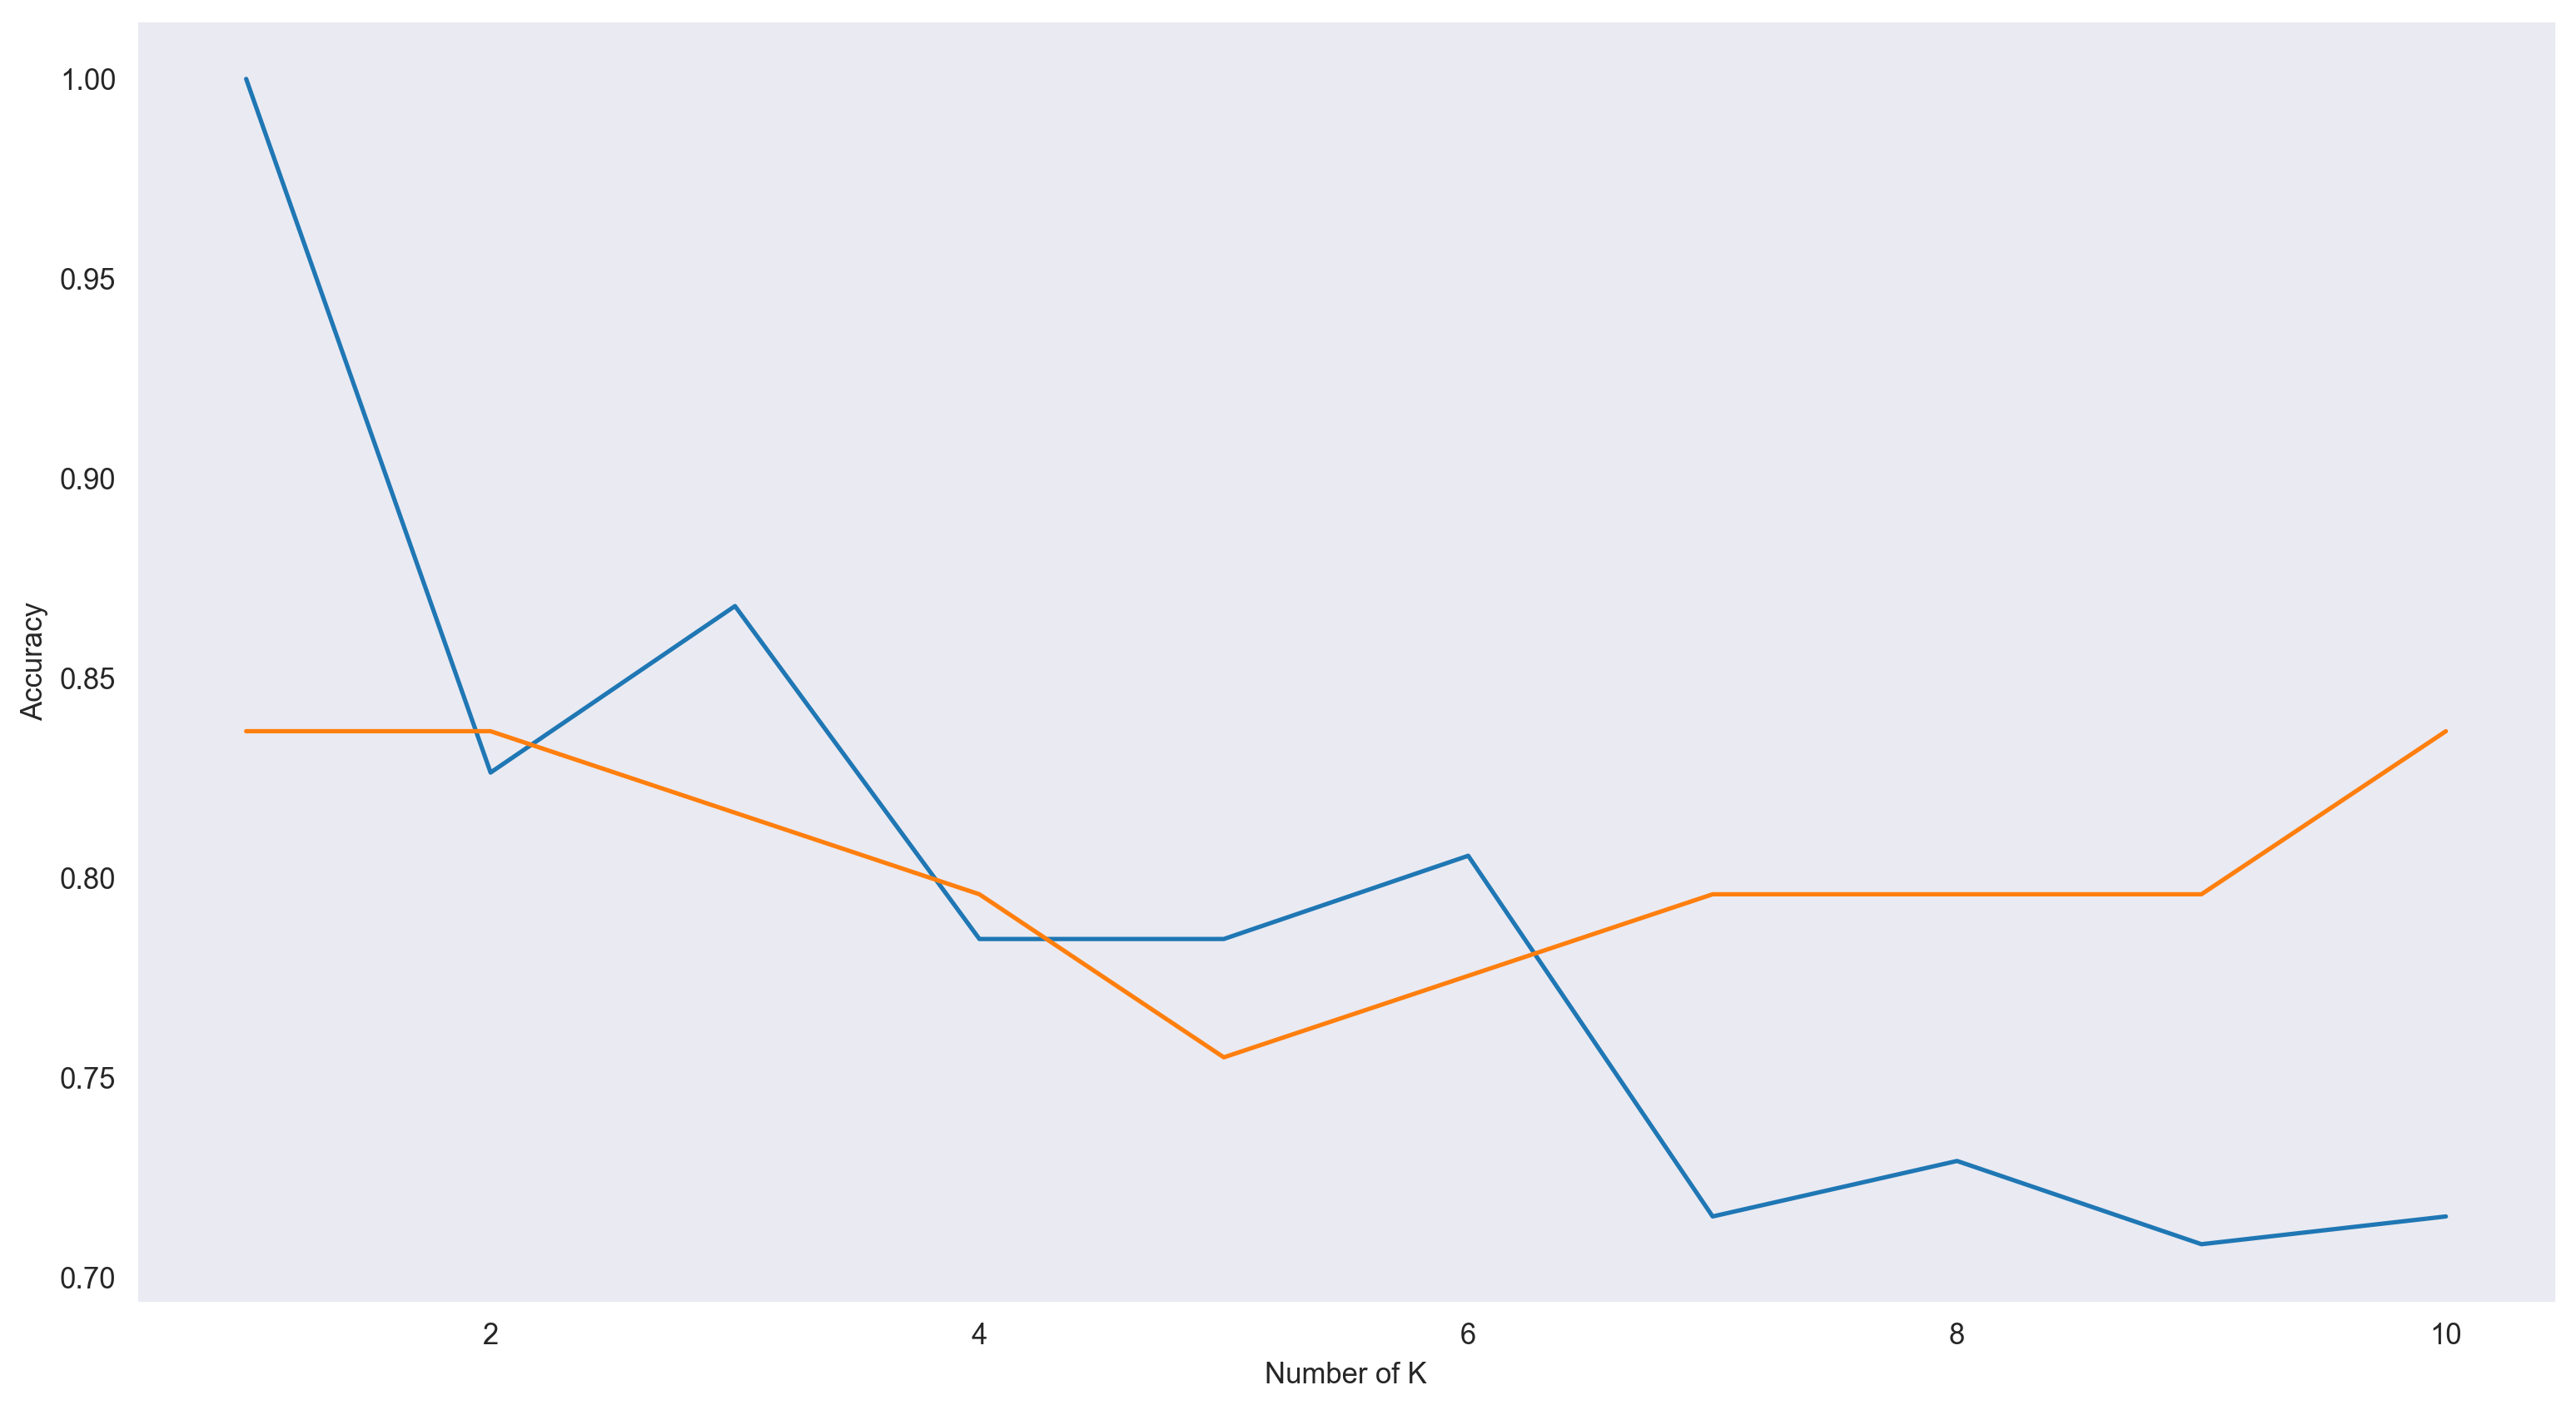

In [ ]:
trainac = []
testac = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)

    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

plt.title('')
plt.plot(range(1,11),trainac)
plt.plot(range(1,11), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

### Creating Final Model With Hyperparameter Value

In [ ]:
model_final = KNeighborsClassifier(n_neighbors = 2)
model_final.fit(xtrain,ytrain)
ypred = model_final.predict(xtest)

#### Evaluating The Model

##### Creating Classification Report

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       0.79      0.85      0.81        13
           3       0.50      0.33      0.40         3
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         8

    accuracy                           0.84        49
   macro avg       0.85      0.74      0.76        49
weighted avg       0.84      0.84      0.83        49



##### Comparing Training And Testing Accuracy

In [ ]:
print('Training Accuracy of are Model is : ' + str(model_final.score(xtrain,ytrain)))
print('Testing Accuracy of are Model is : ' + str(model_final.score(xtest, ytest)))

Training Accuracy of are Model is : 0.8263888888888888
Testing Accuracy of are Model is : 0.8367346938775511
